An End-to-End Project on Time Series Analysis and Forecasting with Python

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.
Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. Let’s get started

# The Data
# We are using Superstore sales data that can be downloaded from here.

https://community.tableau.com/docs/DOC-1236

In [3]:
import warnings
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jjschueder/7333QTW/master/Case%20Study%204/Data/Sample%20-%20Superstore.csv")
furniture = df.loc[df['Category'] == 'Furniture']

We have a good 4-year furniture sales data.

In [5]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,7475,CA-2011-167199,1/6/2013,1/10/2013,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
14,7661,CA-2011-105417,1/7/2013,1/12/2013,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
19,867,CA-2011-149020,1/10/2013,1/15/2013,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
20,717,CA-2011-130092,1/11/2013,1/14/2013,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
26,2979,CA-2011-109232,1/13/2013,1/16/2013,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,5458,CA-2014-130631,12/29/2016,1/2/2017,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,...,98026,West,FUR-FU-10004093,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,2,0.0,20.5380
9982,7633,US-2014-158526,12/29/2016,1/1/2017,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
9985,7636,US-2014-158526,12/29/2016,1/1/2017,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
9986,7637,US-2014-158526,12/29/2016,1/1/2017,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250


In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/10/2013', '9/9/2016')

Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [7]:
#cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 19 to 8455
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null object
Ship Date        2121 non-null object
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 364.5+ KB


In [9]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'].str.strip(), format='%m/%d/%Y')

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

# Indexing with Time Series Data

In [11]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2013-01-06', '2013-01-07', '2013-01-10', '2013-01-11',
               '2013-01-13', '2013-01-14', '2013-01-16', '2013-01-19',
               '2013-01-20', '2013-01-21',
               ...
               '2016-12-18', '2016-12-19', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [12]:
y = furniture['Sales'].resample('MS').mean()

Have a quick peek 2017 furniture sales data.

In [13]:
y['2010':]

Order Date
2013-01-01     480.194231
2013-02-01     367.931600
2013-03-01     857.291529
2013-04-01     567.488357
2013-05-01     432.049187
2013-06-01     695.059242
2013-07-01     601.169500
2013-08-01     457.521656
2013-09-01     992.353367
2013-10-01     769.015437
2013-11-01     980.221486
2013-12-01    1532.298325
2014-01-01     978.328467
2014-02-01     522.395667
2014-03-01     781.236437
2014-04-01     805.822962
2014-05-01     624.996700
2014-06-01     428.565500
2014-07-01     719.706316
2014-08-01     602.412012
2014-09-01    1382.790684
2014-10-01     632.980184
2014-11-01    1286.701354
2014-12-01    1049.355418
2015-01-01     508.182867
2015-02-01     356.868273
2015-03-01     623.654800
2015-04-01     705.557368
2015-05-01     683.235818
2015-06-01     751.678437
2015-07-01     776.430059
2015-08-01     756.627794
2015-09-01    1162.563517
2015-10-01     533.198526
2015-11-01    1346.375352
2015-12-01    1372.914259
2016-01-01     397.602133
2016-02-01     528.179800
2

# Visualizing Furniture Sales Time Series Data

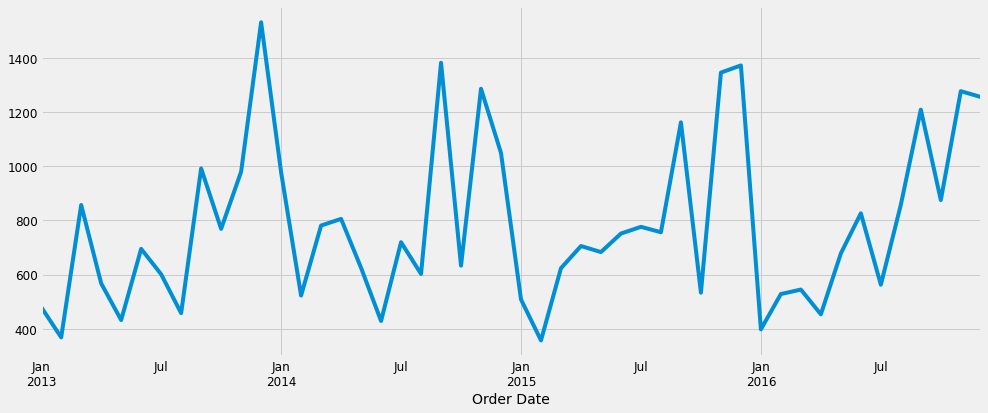

In [14]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

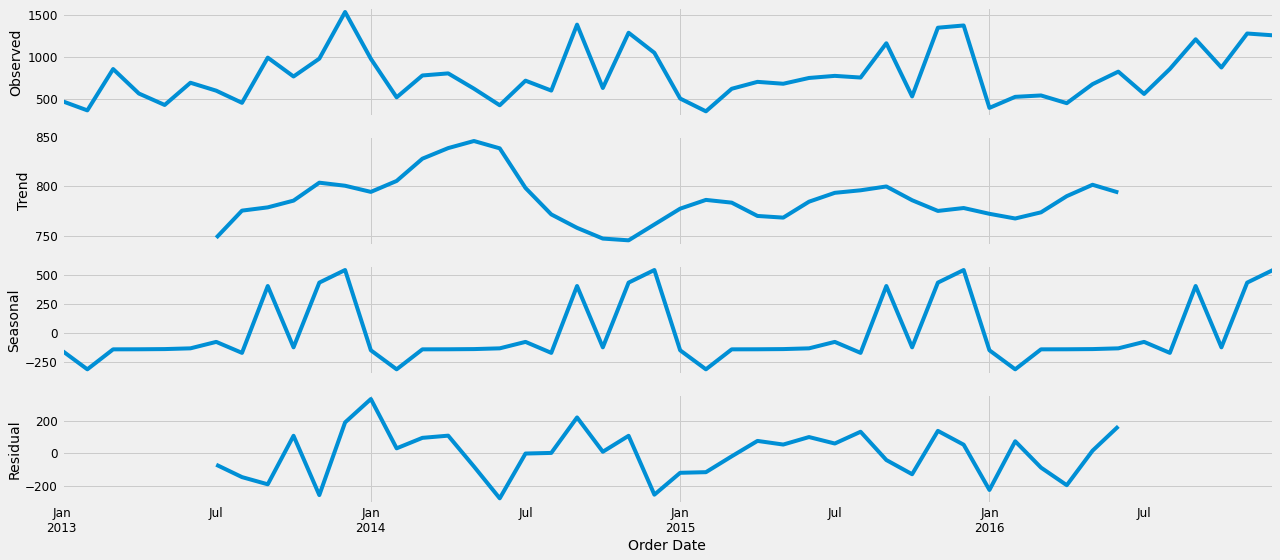

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
y

Order Date
2013-01-01     480.194231
2013-02-01     367.931600
2013-03-01     857.291529
2013-04-01     567.488357
2013-05-01     432.049187
2013-06-01     695.059242
2013-07-01     601.169500
2013-08-01     457.521656
2013-09-01     992.353367
2013-10-01     769.015437
2013-11-01     980.221486
2013-12-01    1532.298325
2014-01-01     978.328467
2014-02-01     522.395667
2014-03-01     781.236437
2014-04-01     805.822962
2014-05-01     624.996700
2014-06-01     428.565500
2014-07-01     719.706316
2014-08-01     602.412012
2014-09-01    1382.790684
2014-10-01     632.980184
2014-11-01    1286.701354
2014-12-01    1049.355418
2015-01-01     508.182867
2015-02-01     356.868273
2015-03-01     623.654800
2015-04-01     705.557368
2015-05-01     683.235818
2015-06-01     751.678437
2015-07-01     776.430059
2015-08-01     756.627794
2015-09-01    1162.563517
2015-10-01     533.198526
2015-11-01    1346.375352
2015-12-01    1372.914259
2016-01-01     397.602133
2016-02-01     528.179800
2

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

# Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [57]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [58]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            df = pd.DataFrame('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.1028329076864
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1474.3761724352948
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.388066155564
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:496.941688492852
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1421.5631336763167
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:319.4769282249068
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.8054702526435
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3076.342007999636
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.2292493113579
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:498.50152562566865
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2750.454857352279
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:321.47680101884583
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:679.8426756163989
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1257.1959138744378
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.39264018885507
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.71214734967083
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1592.108208965271
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:321.3936311404286
ARIMA

In [59]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,1/3/2013,1/7/2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,1/5/2013,1/12/2013,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,908,CA-2014-143259,12/30/2016,1/3/2017,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9990,909,CA-2014-143259,12/30/2016,1/3/2017,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,1297,CA-2014-115427,12/30/2016,1/3/2017,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
9992,1298,CA-2014-115427,12/30/2016,1/3/2017,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

# Fitting the ARIMA model

In [60]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0054      0.318      0.017      0.987      -0.618       0.629
ma.L1         -1.0000      0.403     -2.480      0.013      -1.790      -0.210
ar.S.L12      -0.0219      0.039     -0.557      0.577      -0.099       0.055
sigma2      2.898e+04   1.39e-05   2.08e+09      0.000     2.9e+04     2.9e+04


We should always run model diagnostics to investigate any unusual behavior.

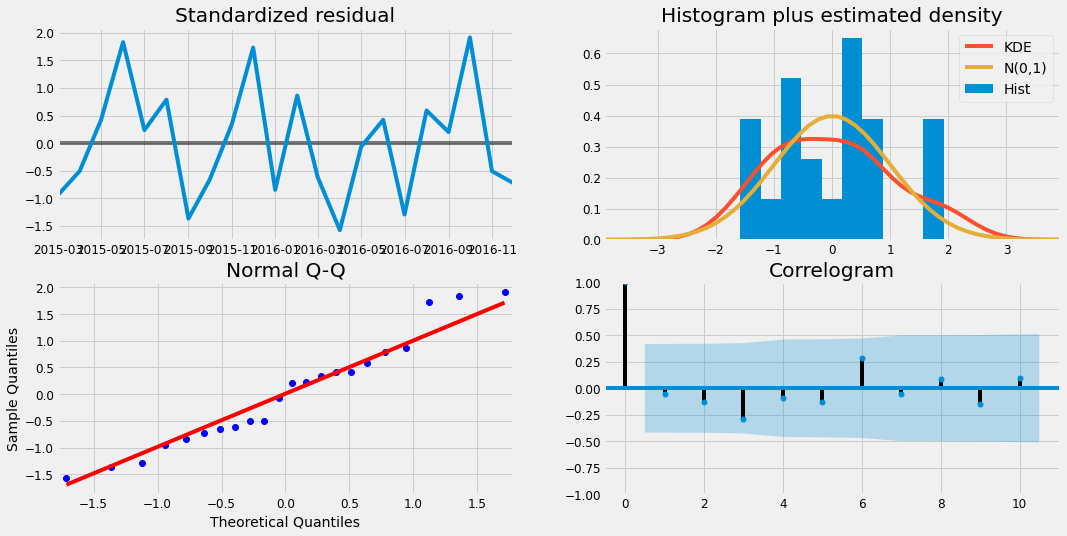

In [61]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

# Producing and visualizing forecasts

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

# Time Series of Furniture vs. Office Supplies

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

# Data Exploration

We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()


In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [ ]:
store.columns

In [ ]:
first_date = store.ax[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']



# Time Series Modeling with Prophet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [ ]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [ ]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

NameError: name 'y' is not defined

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()